# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp-273.15,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lajas
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | keflavik
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | kirakira
Processing Record 10 of Set 1 | kapa'a
Processing Record 11 of Set 1 | midlothian
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | susuman
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | tura
Processing Record 20 of Set 1 | afaahiti
Processing Record 21 of Set 1 | tolanaro
Processing Record 22 of Set 1 | lazaro cardenas
Processing Record 23 

Processing Record 42 of Set 4 | camana
Processing Record 43 of Set 4 | petropavlovsk-kamchatsky
Processing Record 44 of Set 4 | esmeraldas
Processing Record 45 of Set 4 | panamaram
Processing Record 46 of Set 4 | barro alto
Processing Record 47 of Set 4 | nogliki
Processing Record 48 of Set 4 | tomatlan
Processing Record 49 of Set 4 | rongelap
Processing Record 0 of Set 5 | nong wua so
Processing Record 1 of Set 5 | maiwut
City not found. Skipping...
Processing Record 2 of Set 5 | bayanhongor
Processing Record 3 of Set 5 | pekan
Processing Record 4 of Set 5 | aykhal
Processing Record 5 of Set 5 | batyrevo
Processing Record 6 of Set 5 | fort mcmurray
Processing Record 7 of Set 5 | tangalle
Processing Record 8 of Set 5 | matinha
Processing Record 9 of Set 5 | vernon
Processing Record 10 of Set 5 | kodinsk
Processing Record 11 of Set 5 | lospalos
Processing Record 12 of Set 5 | badger
Processing Record 13 of Set 5 | sinabang
Processing Record 14 of Set 5 | keelung
Processing Record 15 of 

Processing Record 35 of Set 8 | cromer
Processing Record 36 of Set 8 | cooma
Processing Record 37 of Set 8 | kolonia
Processing Record 38 of Set 8 | tongouson
Processing Record 39 of Set 8 | saldanha
Processing Record 40 of Set 8 | cabedelo
Processing Record 41 of Set 8 | mayen abun
City not found. Skipping...
Processing Record 42 of Set 8 | lodwar
Processing Record 43 of Set 8 | neryungri
Processing Record 44 of Set 8 | klaksvik
Processing Record 45 of Set 8 | villa maria
Processing Record 46 of Set 8 | garissa
Processing Record 47 of Set 8 | hovd
Processing Record 48 of Set 8 | pathein
Processing Record 49 of Set 8 | bardai
Processing Record 0 of Set 9 | dhari
Processing Record 1 of Set 9 | tutoia
Processing Record 2 of Set 9 | reggane
Processing Record 3 of Set 9 | tafuna
Processing Record 4 of Set 9 | obihiro
Processing Record 5 of Set 9 | usogorsk
Processing Record 6 of Set 9 | pangody
Processing Record 7 of Set 9 | hamilton
Processing Record 8 of Set 9 | fort st. john
Processing 

Processing Record 21 of Set 12 | margate
Processing Record 22 of Set 12 | sur
Processing Record 23 of Set 12 | massawa
Processing Record 24 of Set 12 | tailai
Processing Record 25 of Set 12 | kirensk
Processing Record 26 of Set 12 | saint-joseph
Processing Record 27 of Set 12 | harper
Processing Record 28 of Set 12 | pedernales
Processing Record 29 of Set 12 | batticaloa
Processing Record 30 of Set 12 | lensk
Processing Record 31 of Set 12 | hobyo
Processing Record 32 of Set 12 | crane
Processing Record 33 of Set 12 | ondo
Processing Record 34 of Set 12 | cold lake
Processing Record 35 of Set 12 | soron
Processing Record 36 of Set 12 | bushland beach
City not found. Skipping...
Processing Record 37 of Set 12 | la ronge
Processing Record 38 of Set 12 | yagry
City not found. Skipping...
Processing Record 39 of Set 12 | tegueste
Processing Record 40 of Set 12 | shanhecun
Processing Record 41 of Set 12 | brookings
Processing Record 42 of Set 12 | ormara
Processing Record 43 of Set 12 | san

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lajas,18.0500,-67.0593,26.34,58,12,0.45,PR,1699423708
1,ancud,-41.8697,-73.8203,8.62,89,74,1.21,CL,1699423709
2,wailua homesteads,22.0669,-159.3780,25.44,85,100,5.14,US,1699423709
3,keflavik,64.0049,-22.5624,6.24,56,0,7.72,IS,1699423709
4,port alfred,-33.5906,26.8910,18.43,76,74,1.34,ZA,1699423709


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lajas,18.0500,-67.0593,26.34,58,12,0.45,PR,1699423708
1,ancud,-41.8697,-73.8203,8.62,89,74,1.21,CL,1699423709
2,wailua homesteads,22.0669,-159.3780,25.44,85,100,5.14,US,1699423709
3,keflavik,64.0049,-22.5624,6.24,56,0,7.72,IS,1699423709
4,port alfred,-33.5906,26.8910,18.43,76,74,1.34,ZA,1699423709


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

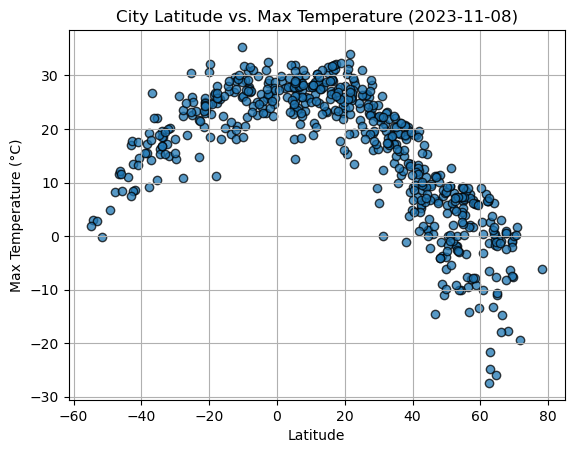

In [8]:
# Build scatter plot for latitude vs. temperature
from datetime import datetime
date_unix = city_data_df["Date"].iloc[0]
date = datetime.utcfromtimestamp(date_unix).strftime('%Y-%m-%d')

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")  # You can change the unit based on your data
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

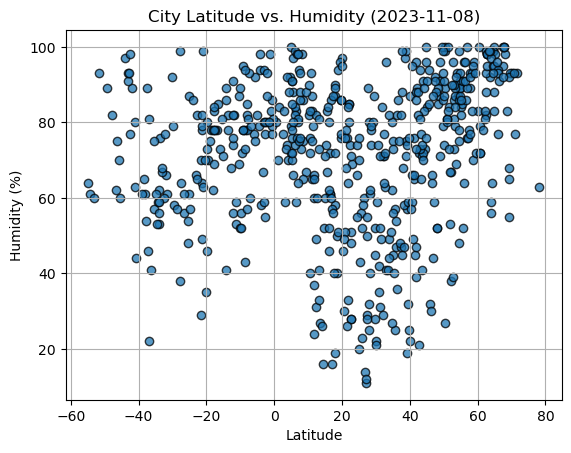

In [9]:
# Build the scatter plots for latitude vs. humidity
from datetime import datetime
date_unix = city_data_df["Date"].iloc[0]
date = datetime.utcfromtimestamp(date_unix).strftime('%Y-%m-%d')

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

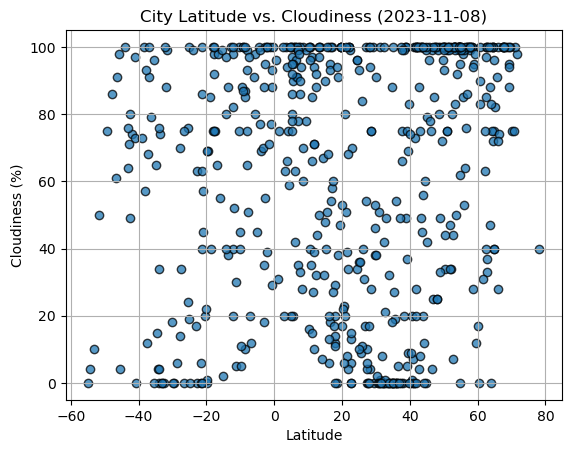

In [10]:
# Build the scatter plots for latitude vs. cloudiness
from datetime import datetime
date_unix = city_data_df["Date"].iloc[0]
date = datetime.utcfromtimestamp(date_unix).strftime('%Y-%m-%d')

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

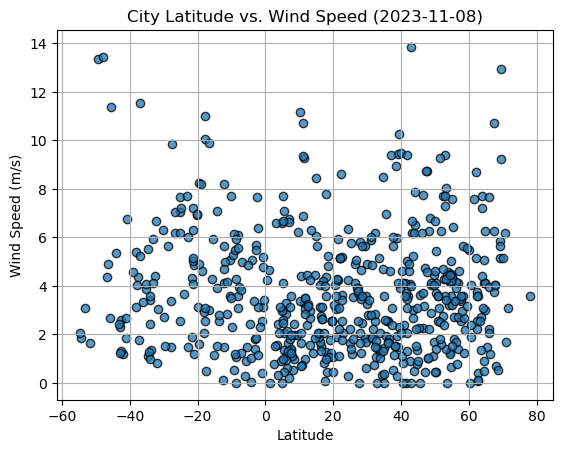

In [11]:
# Build the scatter plots for latitude vs. wind speed
from datetime import datetime
date_unix = city_data_df["Date"].iloc[0]
date = datetime.utcfromtimestamp(date_unix).strftime('%Y-%m-%d')

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")  # You can change the unit based on your data
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots


def create_linear_regression_plot(x_values, y_values, x_label, y_label, line_eq_x, line_eq_y, filename=None):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line
    regress_values = x_values * slope + intercept

    # Create the linear regression equation string
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Create the scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=0.75)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-", label="Regression Line")
    
    # Annotate the regression equation on the plot
    plt.annotate(line_eq, (line_eq_x, line_eq_y), fontsize=15, color="red")

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Print r value
    print(f"The r-value is: {rvalue}")
    
    #Show plot
    plt.show()

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lajas,18.0500,-67.0593,26.34,58,12,0.45,PR,1699423708
2,wailua homesteads,22.0669,-159.3780,25.44,85,100,5.14,US,1699423709
3,keflavik,64.0049,-22.5624,6.24,56,0,7.72,IS,1699423709
5,iqaluit,63.7506,-68.5145,-13.27,92,47,2.73,CA,1699423710
6,ribeira grande,38.5167,-28.7000,20.43,97,100,8.94,PT,1699423710


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ancud,-41.8697,-73.8203,8.62,89,74,1.21,CL,1699423709
4,port alfred,-33.5906,26.8910,18.43,76,74,1.34,ZA,1699423709
7,port-aux-francais,-49.3500,70.2167,4.84,89,75,13.34,TF,1699423710
8,kirakira,-10.4544,161.9205,25.98,87,100,5.05,SB,1699423711
13,puerto natales,-51.7236,-72.4875,-0.26,93,50,1.66,CL,1699423712


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8716406469342273


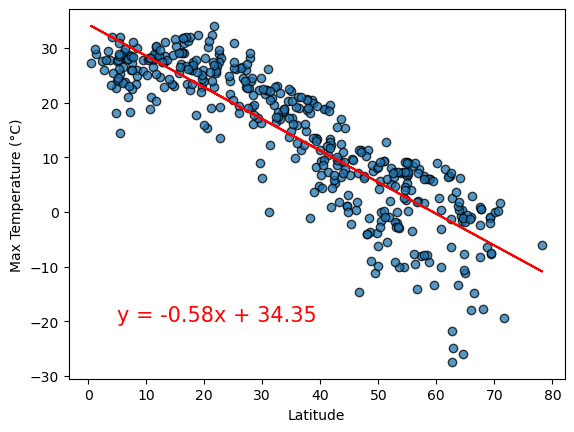

In [32]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", 5, -20)

The r-value is: 0.7977177134713447


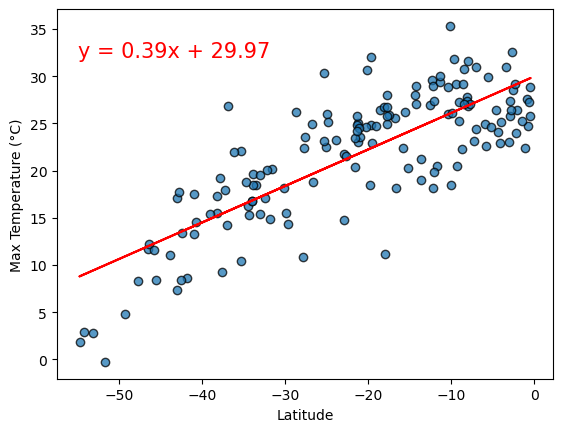

In [41]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", -55, 32)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2702191594984126


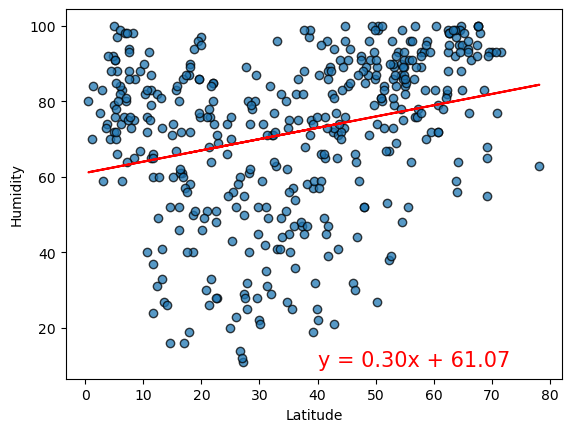

In [40]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", 40, 10)

The r-value is: 0.2018706279701865


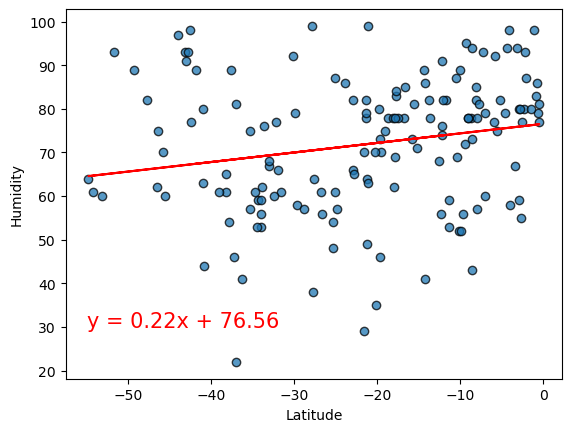

In [35]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", -55, 30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.16373229950295215


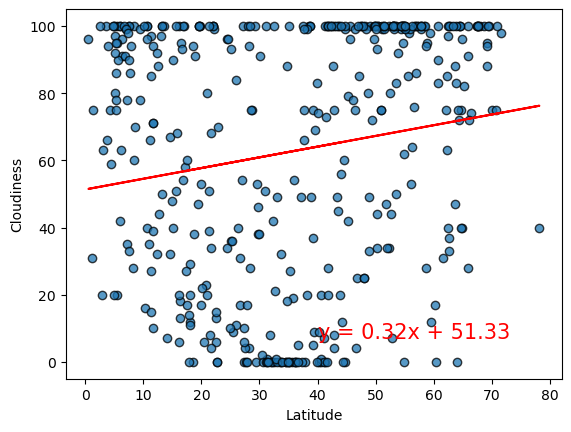

In [36]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", 40, 7)

The r-value is: 0.21319172278096374


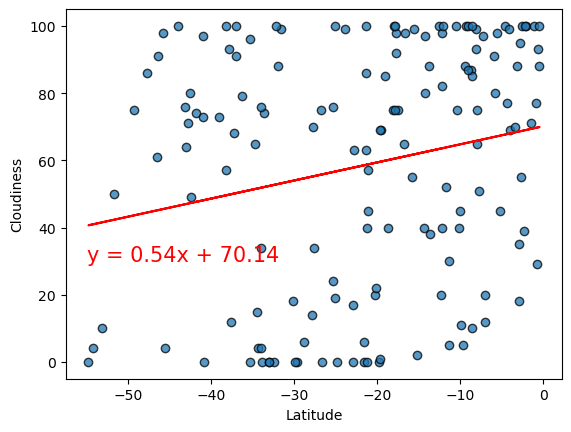

In [37]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", -55, 30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1403001803187161


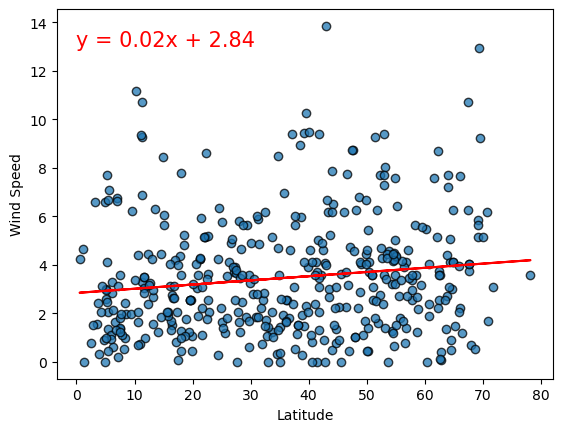

In [38]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", 0, 13)

The r-value is: -0.118283569691536


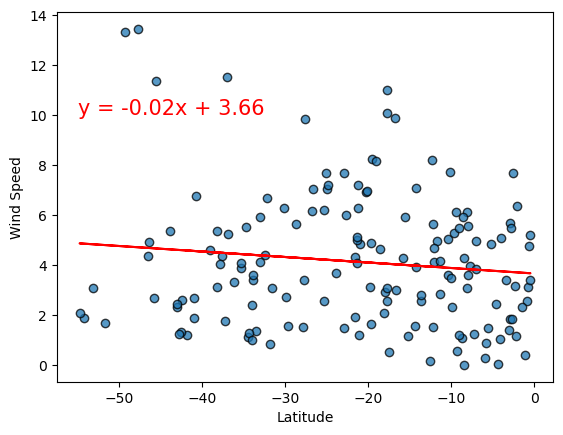

In [39]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", -55, 10)

**Discussion about the linear relationship:** YOUR RESPONSE HERE